<a href="https://colab.research.google.com/github/aquangnguyen1992/tensorflow_colab/blob/mnist_max/mnist_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import data from Google Drive and setup the workspace***

In [1]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree('/content/drive/My Drive/MNIST','/content/MNIST')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/MNIST'

In [2]:
train_data_path = '/content/MNIST/train_max_x'
test_data_path = '/content/MNIST/test_max_x'
label_file = '/content/MNIST/train_max_y.csv'

# ***Read the dataset and show an example***

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_pickle(train_data_path).astype(np.uint8)
#test_data = pd.read_pickle(test_data_path)
train_label = pd.read_csv(label_file)
y = train_label['Label']

In [4]:
'''dataset = (dataset/255.0 - 0.5).astype(np.float16)
#test_data = test_data/255.0
number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]'''

number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]

8 [[0.2235 0.2274 0.2274 ... 0.1686 0.1804 0.2   ]
 [0.2274 0.2354 0.2354 ... 0.1608 0.1726 0.1804]
 [0.2825 0.2744 0.2627 ... 0.1726 0.1804 0.1804]
 ...
 [0.3687 0.298  0.2393 ... 0.392  0.392  0.3726]
 [0.353  0.3333 0.298  ... 0.306  0.302  0.2903]
 [0.302  0.3176 0.3254 ... 0.3215 0.2903 0.298 ]]


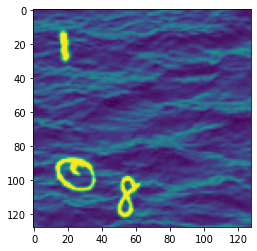

In [5]:
i = np.random.randint(0, X_train.shape[0])
sample = data_preprocessing(X_train)[i]
print(Y_train[i], sample)
plt.imshow(sample.astype(np.float32))

[[0.1882 0.1647 0.1372 0.1569 0.149  0.1372 0.1333 0.1333 0.1333 0.1333
  0.1333 0.1608 0.1765 0.1882 0.1882 0.1843 0.1843 0.196  0.2118 0.2079
  0.2313 0.2666 0.302  0.3254 0.3333 0.341  0.3452 0.3293 0.357  0.3687]
 [0.1882 0.1765 0.1608 0.1412 0.1333 0.1177 0.1177 0.1333 0.153  0.1726
  0.1882 0.1726 0.1843 0.1921 0.2    0.204  0.2079 0.2235 0.2393 0.2588
  0.255  0.2627 0.2942 0.3372 0.3687 0.3804 0.3765 0.357  0.353  0.3647]
 [0.2    0.2079 0.2079 0.1608 0.1569 0.149  0.1451 0.153  0.1647 0.1804
  0.1882 0.2    0.204  0.2157 0.2313 0.251  0.2705 0.298  0.3098 0.2903
  0.2864 0.2825 0.2864 0.2903 0.2942 0.2942 0.2903 0.298  0.349  0.4038]
 [0.2157 0.2235 0.2235 0.2235 0.2235 0.2274 0.2235 0.2079 0.1921 0.1804
  0.1765 0.1843 0.1804 0.1804 0.196  0.2157 0.2393 0.2588 0.2705 0.2903
  0.3176 0.349  0.3452 0.3215 0.306  0.3137 0.3254 0.3293 0.3333 0.3452]
 [0.2196 0.2118 0.204  0.2354 0.251  0.2627 0.2666 0.2588 0.251  0.2432
  0.2432 0.2471 0.2354 0.2235 0.2235 0.2313 0.2432 0.255  0.

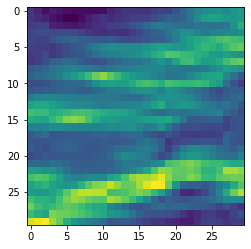

In [6]:
display = sample[55:85, 40:70]
plt.imshow(display.astype(np.float32))
print(display)

(40000, 128, 128) (10000, 128, 128)


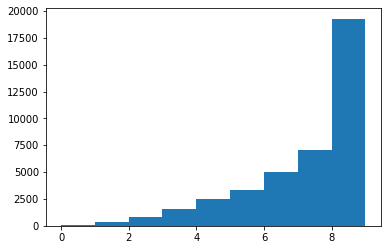

In [7]:
#X_train = np.expand_dims(X_train, axis=3)
#X_test = np.expand_dims(X_test, axis=3)

#print(X_train.shape, X_test.shape)
plt.hist(np.array(Y_train), bins=range(len(number_of_label[0])))
number_of_label[0]

b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train = b

b = np.zeros((Y_test.size, Y_test.max()+1))
b[np.arange(Y_test.size),Y_test] = 1
Y_test = b

def data_preprocessing2(data):
  dataout = (data/255.0)
  #dataout = np.expand_dims(dataout, axis=3)
  return dataout

print(data_preprocessing2(X_train).shape, data_preprocessing2(X_test).shape)

# ***Pipeline X***

28 (28, 28, 3)


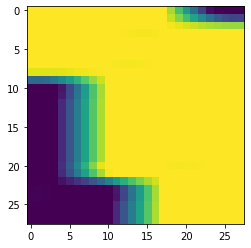

In [205]:
import cv2
def value_crop(input_im, output_size=(28,28), max_detection=3):
  if np.max(input_im) <= 2:
    input_im = (input_im*255)
  #print(input_im.shape, input_im[0])
  ret, black_white = cv2.threshold(input_im, 254, 255, 0)
  contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cropped_section = None

  contour_info = []
  for contour in contours:
    point1 = np.min(contour, axis=0)[0]
    point2 = np.max(contour, axis=0)[0]
    if (point2[0] - point1[0] < 7) and (point2[1] - point1[1] < 7):
       continue
    else:
      contour_info.append([point1, point2, np.linalg.norm(point2-point1)])
      contour_info = sorted(contour_info, key=lambda contour: contour[2], reverse=True)
  #point1 = contour_info[2][0]
  #point2 = contour_info[2][1]
  #plt.imshow(black_white[point1[1]:point2[1], point1[0]:point2[0]])

  # What happen if less than 3 detection
  if len(contour_info) <= max_detection:
    for contour in contour_info:
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
    
    # Padding to have max_detection
    padding = max_detection - len(contour_info)
    for i in range(0, padding):
      temp_im = np.zeros(output_size)
      temp_im = np.expand_dims(temp_im, axis=2)
      cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

  else: # More than 3 detections, get the 3 with biggest size
    for contour in contour_info[:3]:
      #print("Here 2")
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)     

  return cropped_section

output = value_crop(sample.astype(np.uint8), output_size=(28,28))
print(len(output), output.shape)
plt.imshow(output[:,:,np.random.randint(0, output.shape[2])])

In [44]:
def pipeline_X(data):
  #print(data.shape)
  dataout = None
  for each_image in data:
    new_detection = value_crop(each_image)
    if new_detection is not None:
      new_detection = np.expand_dims(new_detection, axis=0)
      if dataout is None:
        dataout = new_detection
      else:
        #print(dataout.shape, new_detection.shape)
        dataout = np.concatenate((dataout, new_detection), axis=0)
  return dataout

result = pipeline_X(X_train)
print(result.shape)


Streaming output truncated to the last 5000 lines.
  71  71  73  73  89  78  74  69  70  71  82  77  75  80  81  74  77  86
  83  85  88  78  78  77  77  77  72  75  70  67  71 105  83  70  72  71
  70  74]
(128, 128) [130 128 125  99  68  59  60  54  46  39  37  33  28  25  39 123 140 126
 136 126  42  41  49  65  52  56  52  48  43  38  35  36  38  43  47  54
  78 149  67  18  45  34  65 142 138 132 133 135 135 138 140  60  30  40
  35  46 132 140 107  28  41  33  39  40  40  42  38  34  34  39  46  50
  52  48  37  30  30  41  43 106 143 122  53  55  37  47  35  46  94 141
 141 136  86  47  61  58  49  50  67 137 133 125  66  47  63  54  56  54
  52  52  54  53  50  37  42  40  38  46  57  52  37  40  30  46  42  37
  33  86]
(128, 128) [130  71  98  35   7  22 117 168 144 120 125 151 164 145 143 146 113 157
 148 143 143 122 148 141 126 139 114 136  62   4   0 108 195  44  57 168
 144 141 151 142 127  52   4 142 175 135 149  33   3  38  40  63  75 171
 189 153 141 120  18   3  32  7

KeyboardInterrupt: ignored

In [141]:
def Pipeline_X_2(data):
  dataout = None
  output_size = (28,28)
  max_detection = 3
  new_detection = None
  for each_image in data:    
    proto_tensor = tf.make_tensor_proto(each_image)
    input_im = tf.make_ndarray(proto_tensor)
    if input_im.shape[0] == 1:
      input_im = np.squeeze(input_im, axis=0)

    ret, black_white = cv2.threshold(input_im, 254, 255, 0)
    contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cropped_section = None

    contour_info = []
    for contour in contours:
      point1 = np.min(contour, axis=0)[0]
      point2 = np.max(contour, axis=0)[0]
      if (point2[0] - point1[0] < 7) and (point2[1] - point1[1] < 7):
        continue
      else:
        contour_info.append([point1, point2, np.linalg.norm(point2-point1)])
        contour_info = sorted(contour_info, key=lambda contour: contour[2], reverse=True)

    # What happen if less than 3 detection
    if len(contour_info) <= max_detection:
      for contour in contour_info:
        point1 = contour[0]
        point2 = contour[1]
        if cropped_section is None:
          cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          cropped_section = np.expand_dims(cropped_section, axis=2)
        else:
          temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          temp_im = np.expand_dims(temp_im, axis=2)
          cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
      
      # Padding to have max_detection
      padding = max_detection - len(contour_info)
      for i in range(0, padding):
        temp_im = np.zeros(output_size)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

    else: # More than 3 detections, get the 3 with biggest size
      for contour in contour_info[:3]:
        point1 = contour[0]
        point2 = contour[1]
        if cropped_section is None:
          cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          cropped_section = np.expand_dims(cropped_section, axis=2)
        else:
          temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          temp_im = np.expand_dims(temp_im, axis=2)
          cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

    new_detection = cropped_section

    if new_detection is not None:
      new_detection = np.expand_dims(new_detection, axis=0)
      if dataout is None:
        dataout = new_detection
      else:
        #print(dataout.shape, new_detection.shape)
        dataout = np.concatenate((dataout, new_detection), axis=0)
 

  return dataout

In [206]:
def Processed_X_map(input_im, output_size=(28,28), max_detection=3):
  #print(input_im.shape, input_im[0])
  proto_tensor = tf.make_tensor_proto(input_im)
  input_im = tf.make_ndarray(proto_tensor)
  #print(input_im.shape, input_im[0])\

  ret, black_white = cv2.threshold(input_im, 254, 255, 0)
  contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cropped_section = None
  contour_info = []
  
  for contour in contours:
    point1 = np.min(contour, axis=0)[0]
    point2 = np.max(contour, axis=0)[0]
    if (point2[0] - point1[0] < 7) and (point2[1] - point1[1] < 7):
       continue
    else:
      contour_info.append([point1, point2, np.linalg.norm(point2-point1)])
      contour_info = sorted(contour_info, key=lambda contour: contour[2], reverse=True)

  # What happen if less than 3 detection
  if len(contour_info) <= max_detection:
    for contour in contour_info:
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        #print("1")
        #print(black_white)
        im = black_white[point1[1]:point2[1], point1[0]:point2[0]]
        cropped_section = tf.image.resize_with_pad(np.expand_dims(im, axis=2), target_height=28, target_width=28).numpy()
        #cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        #print("2")
        #print(black_white)
        im = black_white[point1[1]:point2[1], point1[0]:point2[0]]
        temp_im = tf.image.resize_with_pad(np.expand_dims(im, axis=2), target_height=28, target_width=28).numpy()
        #temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        #temp_im = np.squeeze(temp_im,)
        #temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
    
    # Padding to have max_detection
    padding = max_detection - len(contour_info)
    for i in range(0, padding):
      temp_im = np.zeros(output_size)
      temp_im = np.expand_dims(temp_im, axis=2)
      cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

  else: # More than 3 detections, get the 3 with biggest size
    for contour in contour_info[:3]:
      #print("Here 2")
      point1 = contour[0]
      point2 = contour[1]
      #print(point1, point2)
      if cropped_section is None:
        #print("3")
        #print(black_white)
        #cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        im = black_white[point1[1]:point2[1], point1[0]:point2[0]]
        cropped_section = tf.image.resize_with_pad(np.expand_dims(im, axis=2), target_height=28, target_width=28).numpy()
        #print(im.shape, cropped_section.shape)
        #cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        #print("4")
        #print(black_white)
        im = black_white[point1[1]:point2[1], point1[0]:point2[0]]
        temp_im = tf.image.resize_with_pad(np.expand_dims(im, axis=2), target_height=28, target_width=28).numpy()
        #print(im.shape, temp_im.shape)
        #temp_im = np.expand_dims(temp_im, axis=2)
        #print(cropped_section.shape, temp_im.shape)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
  
  print(cropped_section.shape)
  return cropped_section

In [ ]:
#Pipeline_X_2([X_train[0]])
#Processed_X = tf.py_function(Pipeline_X_2, inp=[X_train[0:64]], Tout=tf.float32)
#print(Processed_X.get_shape)
dataset = tf.data.Dataset.from_tensor_slices(X_train)

mapped_data = dataset.map(lambda x: tf.py_function(func=Processed_X_map, inp=[x, (28,28), 3], Tout=tf.float32))

list(mapped_data.batch(32).as_numpy_iterator())

(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28,

# ***Keras Solution***

In [144]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

In [145]:
def create_model(conv2d_1=32, str_1=1, conv2d_2=32, str_2=1, dense_node=32, dr=0.0):
  my_model = Sequential()
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), strides=(str_1, str_1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 3)))
  my_model.add(Conv2D(conv2d_2, kernel_size=(3,3), activation='relu'))
  my_model.add(MaxPool2D(pool_size=(2,2)))
  my_model.add(Flatten())
  my_model.add(Dropout(dr))
  my_model.add(BatchNormalization())
  my_model.add(Dense(dense_node, activation='relu'))
  my_model.add(Dropout(dr))
  #my_model.add(Dense(3, activation='relu'))
  my_model.add(Dense(len(number_of_label[0]), activation='softmax'))

  #my_model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2], 1)))
  #my_model.add(Dense(128*128, activation='relu'))
  #my_model.add(Dense(len(number_of_label[0]), activation='softmax'))
  #my_model.add(Dense(1, activation='relu'))

  optimizerAdam = Adam(lr=0.0001, amsgrad=True)
  optimizerSGD = SGD(learning_rate=0.005, momentum=0.001, nesterov=False)
  
  my_model.compile(loss='categorical_crossentropy',
                optimizer=optimizerSGD,
                metrics=['accuracy'])

  #my_model.compile(loss='sparse_categorical_crossentropy',
  #              optimizer=optimizerSGD,
  #              metrics=['accuracy'])
  
  return my_model

In [149]:
BATCH = 64
my_model = create_model(conv2d_1=128, str_1=2, conv2d_2=128, str_2=1, dense_node=64, dr=0.4)
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 63, 63, 128)       3584      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 115200)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 115200)            460800    
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [153]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
filepath="weight_model_cnn_best.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_weights_only=False, verbose=1, save_best_only=True, mode='max')


history = my_model.fit(
  Processed_X, Y_train[:256],
  epochs=300, verbose=1,
  batch_size = BATCH, shuffle=True,
  callbacks=[early_stop, checkpoint])

Epoch 1/300


ValueError: ignored

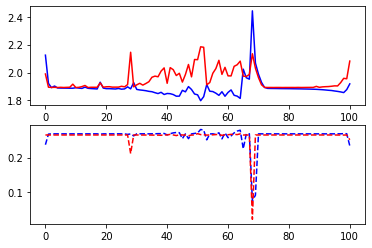

In [ ]:
plt.subplot(211)
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')

plt.subplot(212)
plt.plot(history.history['accuracy'], '--b')
plt.plot(history.history['val_accuracy'], '--r')